In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
%load_ext autoreload
%autoreload 2
%run '../main.py'

In [3]:
dataSetOps = DataSetOps()

dataSetOps.import_years(2017, 2017)

dataSetOps.prepare()


df = dataSetOps.df

In [4]:
len(df)

370635

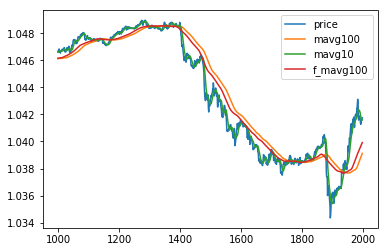

In [5]:
df['f_mavg100'] = df['mavg100'].shift(-15)
df['f_price'] = df['price'].shift(-15)
epilson = 0.00001
df['value'] = df['f_mavg100'] - df['mavg100'] > epilson
df[['price', 'mavg100', 'mavg10', 'f_mavg100']].head(1000).plot()

0.4779958719494921


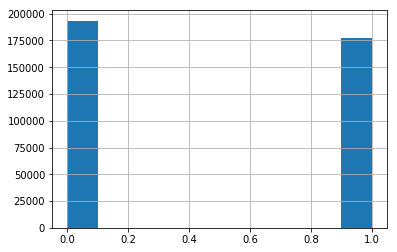

In [6]:
df['value'].astype(int).hist()
print(len(df[df['value']]) / (len(df)))

In [7]:
X = df[['price', 'mavg10', 'mavg20', 'mavg100', 'mavg1000']]
Y = df['value']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

#Initializing Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 32, init = 'uniform', activation = 'relu', input_dim = 5))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 32, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling Neural Network
from keras import metrics
metric_names = [metrics.mae, 'accuracy']
classifier.compile(optimizer='adam', loss = 'mean_squared_error', metrics=metric_names)

# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 20, epochs = 2)

Using TensorFlow backend.
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=5, units=32, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`
  if sys.path[0] == '':
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/2
333571/333571 [==============================] - 7s 20us/step - loss: 0.2206 - mean_absolute_error: 0.4465 - acc: 0.6348
Epoch 2/2
333571/333571 [==============================] - 7s 20us/step - loss: 0.1515 - mean_absolute_error: 0.3163 - acc: 0.7765


In [12]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
from lib.helper import AccuracyCalculator

# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, (y_pred > 0.5))

AccuracyCalculator.class_accuracy(cm)
AccuracyCalculator.optimistic_accuracy(y_pred[:,0], y_test, 100)
risk_hist_df = AccuracyCalculator.risk_hist(y_pred[:,0], y_test)


class_accuracy => accuracy:  0.8317789960857435 risk:  0.20438858555681466
optimistic_accuracy => risk:  0.0 min pass point:  0.94771904


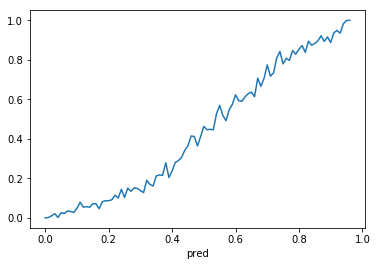

In [13]:
(1-risk_hist_df.risk).plot()

In [11]:
cm

array([[15326,  3968],
       [ 2324, 15446]])